In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
db_file = '/content/drive/MyDrive/northwind database.db'

In [ ]:
conn = sqlite3.connect(db_file)

In [ ]:
mur = conn.cursor()

In [ ]:
mur.execute("""SELECT o.OrderDate ,o.ShippedDate ,od.Quantity, p.UnitsInStock, p.supplierID, p.UnitsOnOrder, o.freight
            FROM Products as P
            LEFT JOIN OrderDetails as od ON p.ProductID = od.ProductID
            LEFT JOIN Orders as o ON od.OrderID = o.OrderID
""")

In [ ]:
df1 = pd.DataFrame(mur.fetchall())

In [ ]:
df1.columns = [X[0] for X in mur.description]

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609283 entries, 0 to 609282
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   OrderDate     609283 non-null  object 
 1   ShippedDate   609210 non-null  object 
 2   Quantity      609283 non-null  int64  
 3   UnitsInStock  609283 non-null  int64  
 4   SupplierID    609283 non-null  int64  
 5   UnitsOnOrder  609283 non-null  int64  
 6   Freight       609283 non-null  float64
dtypes: float64(1), int64(4), object(2)
memory usage: 32.5+ MB


In [ ]:
def parse_date(date_str):
    try:
        return pd.to_datetime(date_str, format='%Y-%m-%d %H:%M:%S')
    except ValueError:
      #try:
        return pd.to_datetime(date_str, format='%Y-%m-%d')
     # except ValueError:
      #  return pd.NaT

df1['OrderDate'] = df1['OrderDate'].apply(parse_date)
df1['ShippedDate'] = df1['ShippedDate'].apply(parse_date)

#df1['OrderDate'] = pd.to_datetime(df1['OrderDate']).dt.date
#df1['ShippedDate'] = pd.to_datetime(df1['ShippedDate']).dt.date

In [ ]:
df1

In [ ]:
df1['DeliveryTimes'] = df1['ShippedDate'] - df1['OrderDate']

In [ ]:
group_by_delivery = df1.groupby(['SupplierID']).agg({'DeliveryTimes': 'mean'})

In [ ]:
group_by_delivery

,DeliveryTimes
SupplierID,
1,7 days 20:24:05.064166842
2,7 days 18:12:09.702266700
3,7 days 20:04:06.443233462
4,7 days 19:44:53.909919412
5,7 days 20:21:35.880816894
6,7 days 19:20:26.795470808
7,7 days 19:16:29.921648859
8,7 days 19:38:21.595361312
9,7 days 18:29:17.086453882


In [ ]:
#THERE IS AN AVERAGE OF 7DAYS ,OBVIOUSLY DIFFERENT CLOCK TIME ACROSS THE SUPPLIERS...WHICH GOES TO SHOW HOW RELIABLE THEY ARE WITH DELIVERING ITEMS.

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='SupplierID', y='DaysOnly', data = group_by_delivery)
plt.xlabel('SupplierID')
plt.ylabel('Average Delivery Time (Days)')
plt.title('Average Delivery Time by SupplierID')

In [ ]:
df1.head()

,OrderDate,ShippedDate,Quantity,UnitsInStock,SupplierID,UnitsOnOrder,DeliveryTimes
0,2016-08-20,2016-08-26,45,39,1,0,6 days
1,2016-08-30,2016-09-05,18,39,1,0,6 days
2,2016-09-30,2016-10-10,20,39,1,0,10 days
3,2016-11-07,2016-11-15,15,39,1,0,8 days
4,2016-11-14,2016-11-20,12,39,1,0,6 days


In [ ]:
group_by_units = df1.groupby(['SupplierID']).agg({'UnitsInStock': 'mean'})

In [ ]:
group_by_units.round(1)

,UnitsInStock
SupplierID,
1,23.0
2,33.2
3,47.0
4,21.4
5,54.1
6,32.7
7,21.9
8,18.6
9,82.5


Text(0.5, 1.0, 'Average Units of Product by SupplierID')

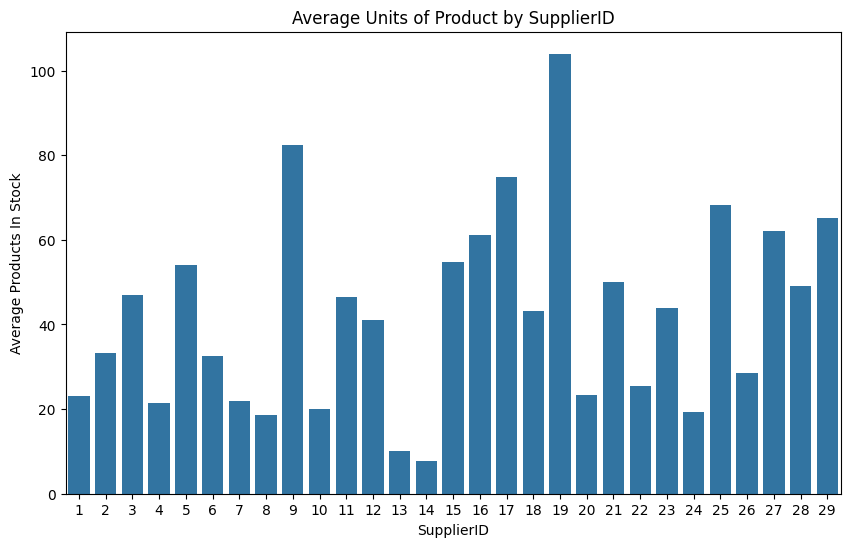

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='SupplierID', y='UnitsInStock', data = group_by_units)
plt.xlabel('SupplierID')
plt.ylabel('Average Products In Stock')
plt.title('Average Units of Product by SupplierID')

In [ ]:
group_by_Rates = df1.groupby(['SupplierID']).agg({'Quantity': 'mean', 'UnitsOnOrder': 'mean'})

In [ ]:
group_by_Rates#.round(2)

,Quantity,UnitsOnOrder
SupplierID,,
1,25.520955,36.683375
2,25.453469,25.380390
3,25.553410,0.000000
4,25.469960,6.651759
5,25.540081,14.962069
6,25.419998,0.000000
7,25.537958,2.025457
8,25.754086,12.377737
9,25.279261,0.000000


In [ ]:
#Order Fulfillment Rates
group_by_Rates['OrderFulfillmentRates'] = (group_by_Rates['Quantity'] / group_by_Rates['UnitsOnOrder']) * 100

In [ ]:
group_by_Rates.round(2)

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Quantity,UnitsOnOrder,OrderFulfillmentRates
SupplierID,,,
1,25.52,36.68,69.57
2,25.45,25.38,100.29
3,25.55,0.00,inf
4,25.47,6.65,382.91
5,25.54,14.96,170.70
6,25.42,0.00,inf
7,25.54,2.03,1260.85
8,25.75,12.38,208.07
9,25.28,0.00,inf


In [ ]:
group_by_Rates['OrderFulfillmentRates'].replace(float('inf'), pd.NA, inplace=True)

Text(0.5, 1.0, 'Order Fulfillment Rate by SupplierID')

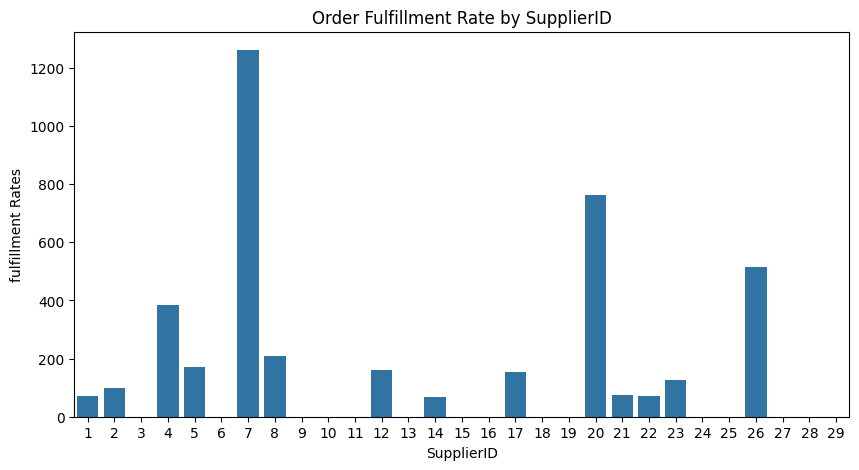

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='SupplierID', y='OrderFulfillmentRates', data = group_by_Rates)
plt.xlabel('SupplierID')
plt.ylabel('fulfillment Rates')
plt.title('Order Fulfillment Rate by SupplierID')

In [ ]:
#Summary
#-Suppliers with a fulfillment rate greater than 100% delivered more units than ordered.
#-Suppliers with a fulfillment rate less than 100% delivered fewer units than ordered.
#-An infinite fulfillment rate indicates a discrepancy in order records where units were delivered without corresponding orders.

In [ ]:
nur = conn.cursor()

In [ ]:
nur.execute("""SELECT p.productID, p.ProductName, od.Discount,p.discontinued,sum(od.UnitPrice) as UnitPrice,sum(o.freight) as Freight, c.Region, sum
            (od.Quantity) as Quantity
            FROM Products as P
            LEFT JOIN OrderDetails as od ON p.ProductID = od.ProductID
            LEFT JOIN Orders as o ON od.OrderID = o.OrderID
            LEFT JOIN Customers as c ON o.CustomerID = c.CustomerID
            WHERE Discontinued = 0
            GROUP BY p.ProductID
""")

In [ ]:
df2 = pd.DataFrame(nur.fetchall())

In [ ]:
df2.columns = [X[0] for X in nur.description]

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ProductID     69 non-null     int64  
 1   ProductName   69 non-null     object 
 2   Discount      69 non-null     float64
 3   Discontinued  69 non-null     object 
 4   UnitPrice     69 non-null     float64
 5   Freight       69 non-null     float64
 6   Region        69 non-null     object 
 7   Quantity      69 non-null     int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 4.4+ KB


In [ ]:
# Calculate Revenue considering the discount
df2['Revenue'] = df2['UnitPrice'] * df2['Quantity'] * (1 - df2['Discount'])

In [ ]:
#Freights being a COGS(Cost of goods sold)
df2['GrossProfit'] = df2['Revenue'] - df2['Freight']

In [ ]:
# Calculate Profit Margin
df2['ProfitMargin'] = (df2['GrossProfit'] / df2['Revenue']) * 100

In [ ]:
df2[['ProductID','ProductName','Region','ProfitMargin']].set_index('ProductID')

,ProductName,Region,ProfitMargin
ProductID,,,
1,Chai,Western Europe,99.988313
2,Chang,Western Europe,99.991149
3,Aniseed Syrup,British Isles,99.983187
4,Chef Anton's Cajun Seasoning,British Isles,99.992227
6,Grandma's Boysenberry Spread,British Isles,99.993242
...,...,...,...
73,Röd Kaviar,Northern Europe,99.988626
74,Longlife Tofu,Western Europe,99.983116
75,Rhönbräu Klosterbier,Northern Europe,99.978257


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68],
 [Text(0, 0, 'Chai'),
  Text(1, 0, 'Chang'),
  Text(2, 0, 'Aniseed Syrup'),
  Text(3, 0, "Chef Anton's Cajun Seasoning"),
  Text(4, 0, "Grandma's Boysenberry Spread"),
  Text(5, 0, "Uncle Bob's Organic Dried Pears"),
  Text(6, 0, 'Northwoods Cranberry Sauce'),
  Text(7, 0, 'Ikura'),
  Text(8, 0, 'Queso Cabrales'),
  Text(9, 0, 'Queso Manchego La Pastora'),
  Text(10, 0, 'Konbu'),
  Text(11, 0, 'Tofu'),
  Text(12, 0, 'Genen Shouyu'),
  Text(13, 0, 'Pavlova'),
  Text(14, 0, 'Carnarvon Tigers'),
  Text(15, 0, 'Teatime Chocolate Biscuits'),
  Text(16, 0, "Sir Rodney's Marmalade"),
  Text(17, 

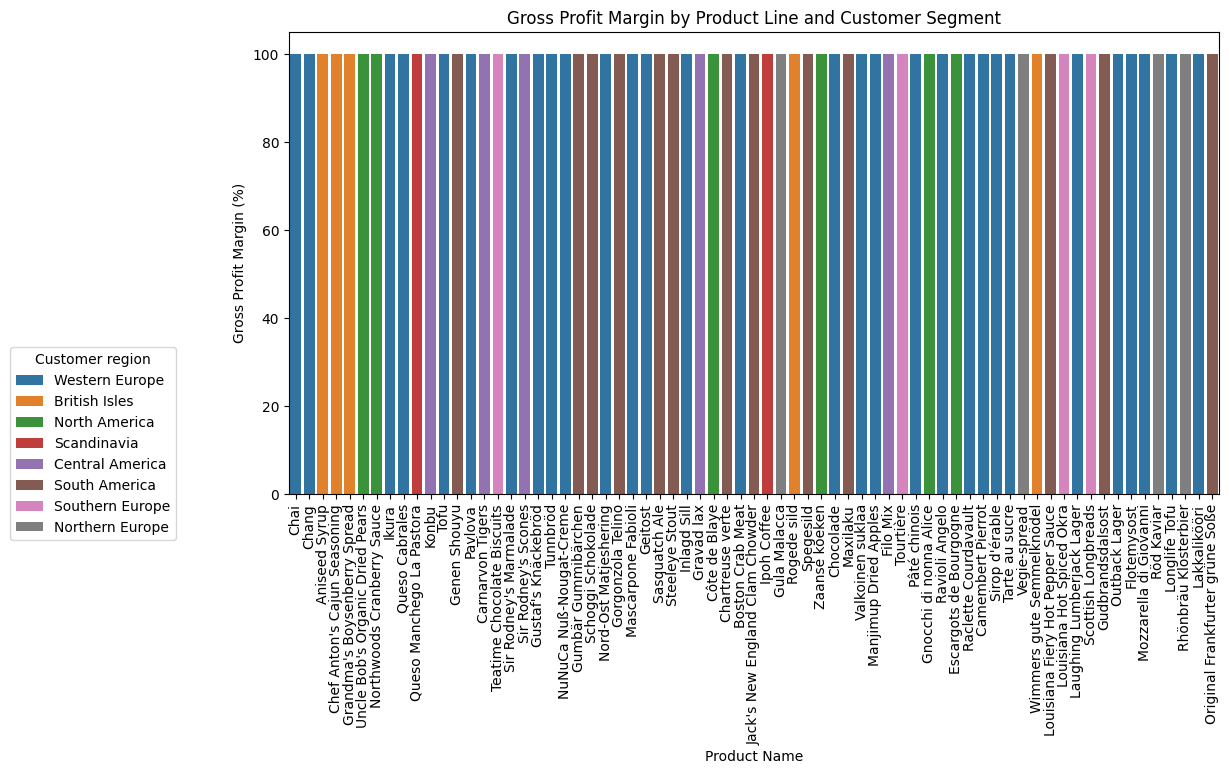

In [ ]:
# Plot Gross Profit Margin by Product Line and Customer Segment
plt.figure(figsize=(12, 6))
sns.barplot(x='ProductName', y='ProfitMargin', hue='Region', data=df2)
plt.xlabel('Product Name')
plt.ylabel('Gross Profit Margin (%)')
plt.title('Gross Profit Margin by Product Line and Customer Segment')
plt.legend(title='Customer region', loc =(-0.3,-0.1))
plt.xticks(rotation=90)

In [ ]:
#